### ***1. Set up and Configurations***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import importlib
import sys
sys.path.append(r"F:\Yellow Stone Flood-2022\floodanalysis\Data\Advan Mobility")
warnings.filterwarnings('ignore')

# Import local modules (these MUST be in the same folder as this notebook)
import advan_mobility_config as confi
import advan_mobility_visualization_functions as viz

# Apply plot style
confi.setup_plot_style()
print ("Module imported successfully")
importlib.reload(viz) 

# Load data
data, time_periods, counties, covid_idx = viz.load_data()


Module imported successfully


### ***2. Normalized Analysis (Individual Counties)***

Saved: Normalized_Laramie_County.png


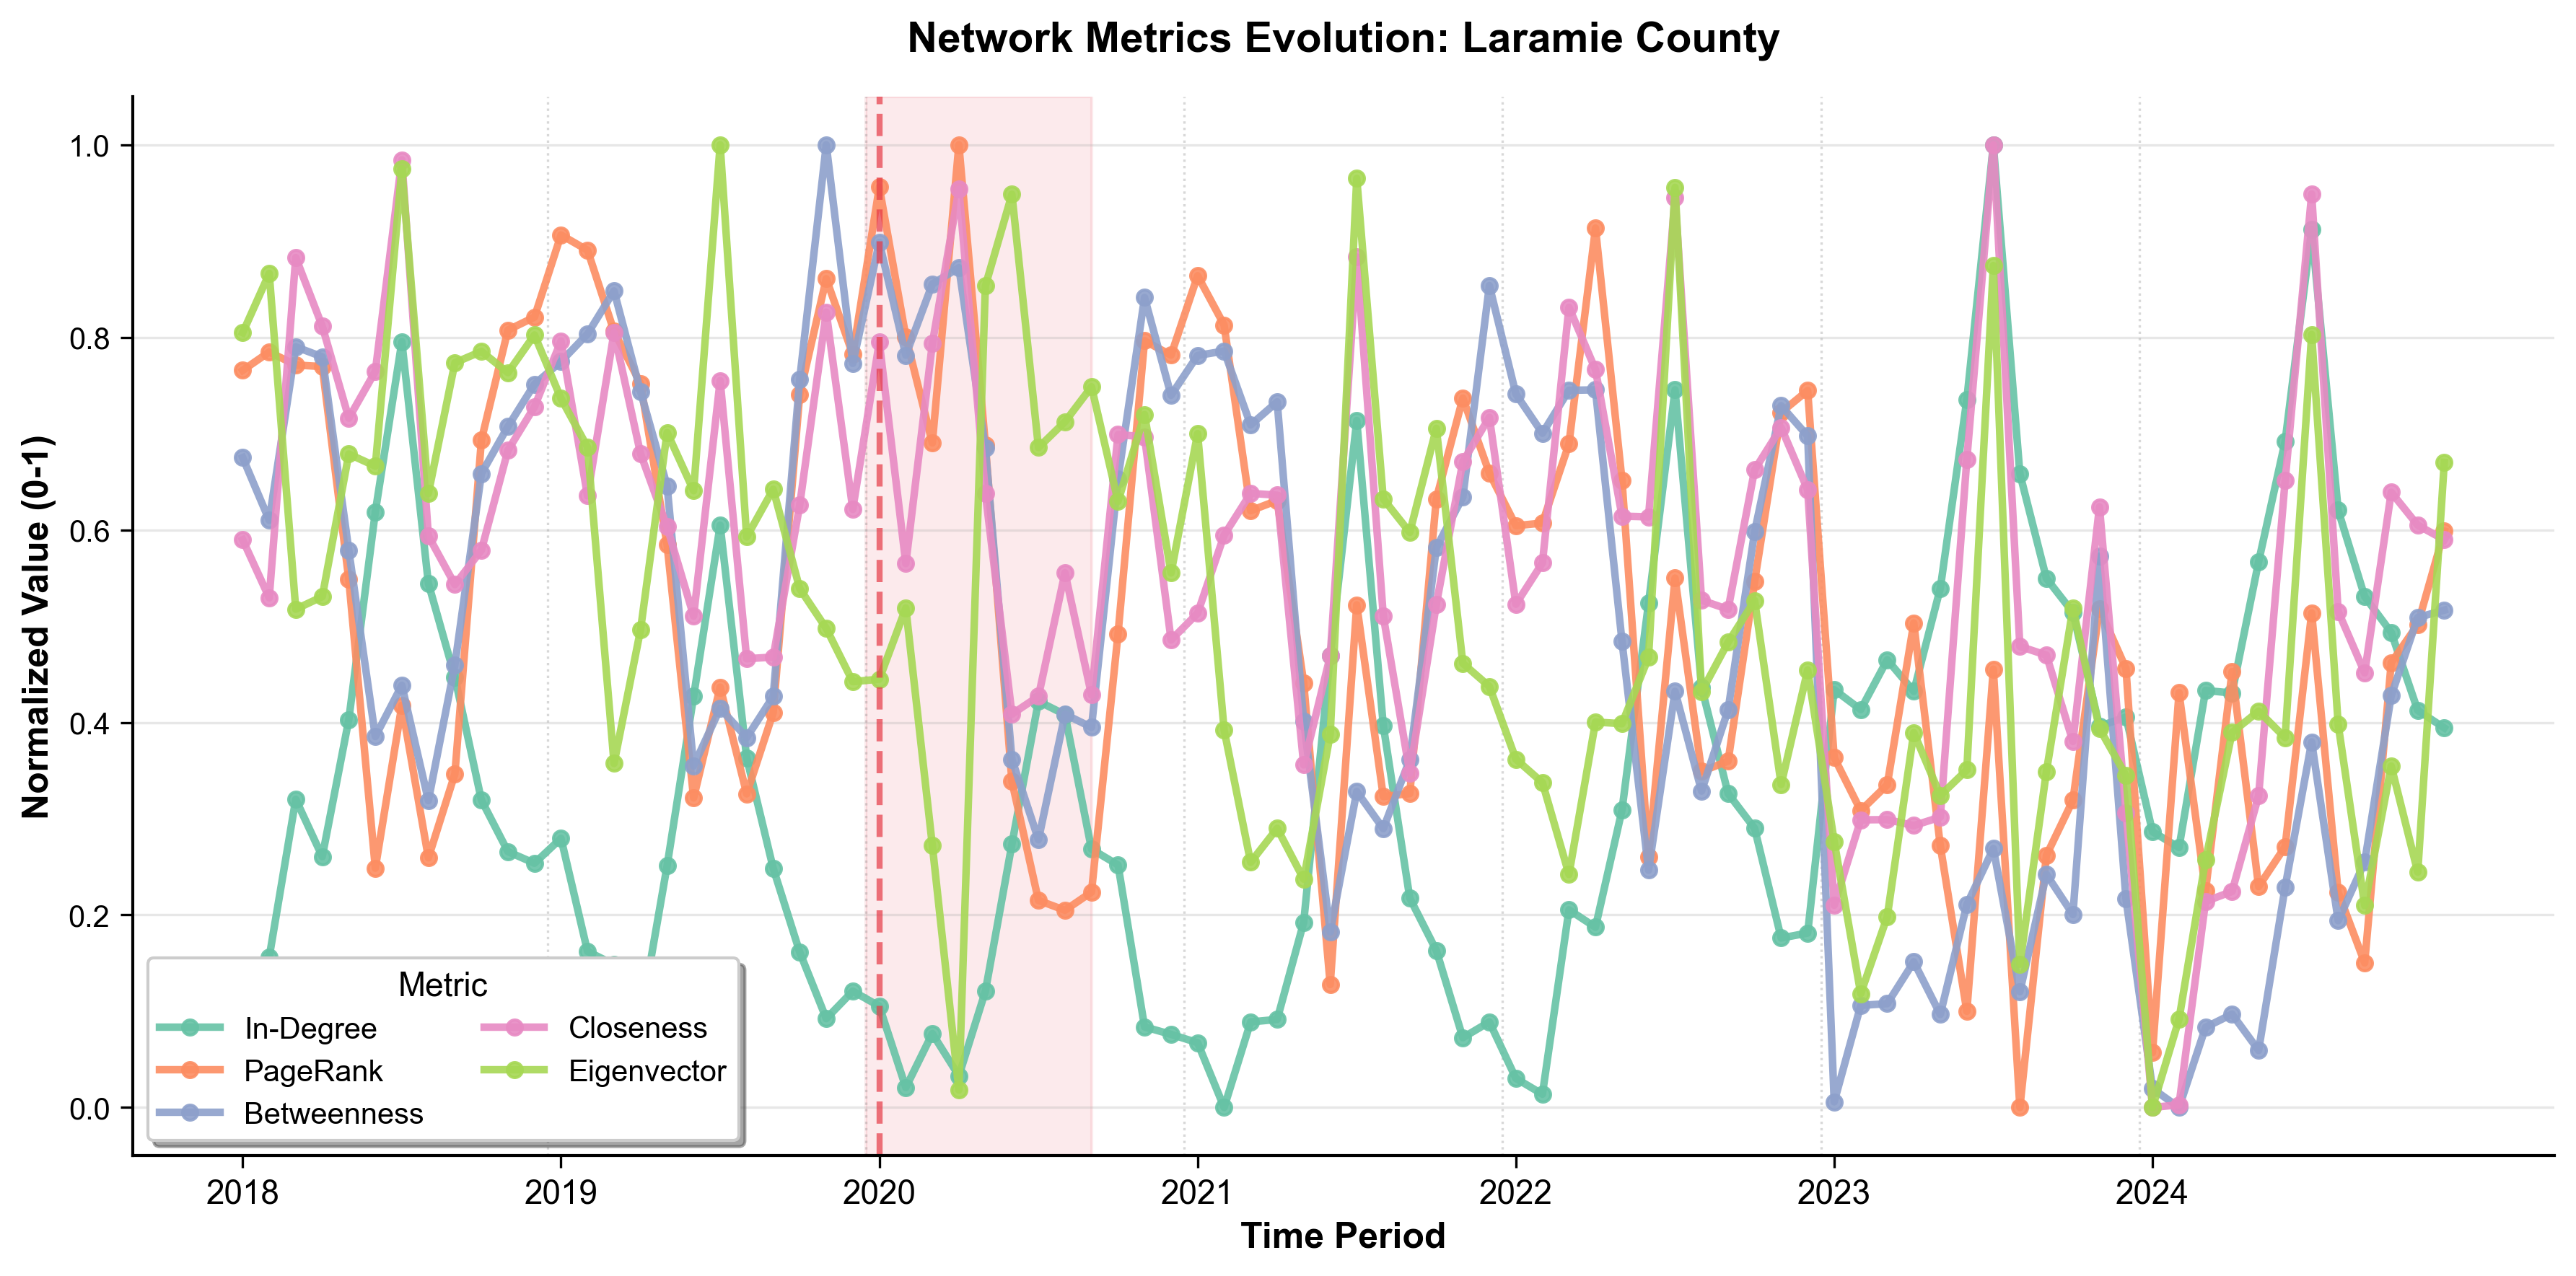

In [6]:
viz.plot_normalized_comparison(
    metrics_list=['InDegree', 'PageRank', 'Betweenness', 'Closeness', 'Eigenvector'],
    county_name='Laramie',
    savepath=confi.OUTPUT_DIR / "Normalized_Laramie_County.png"
)

### ***3. Sumamry Statistics***

In [7]:
summary_stats = pd.DataFrame()

for metric in confi.KEY_METRICS:
    if metric not in data:
        continue
    
    df_metric = data[metric]
    summary_stats[f"{metric}_mean"] = df_metric.mean(axis=1)
    summary_stats[f"{metric}_std"]  = df_metric.std(axis=1)
    summary_stats[f"{metric}_max"]  = df_metric.max(axis=1)
    summary_stats[f"{metric}_min"]  = df_metric.min(axis=1)

summary_path = confi.OUTPUT_DIR / "Summary_Statistics.csv"
summary_stats.to_csv(summary_path)
print(f"\n✓ Summary statistics saved to: {summary_path}")

summary_stats.iloc[:5, :8]



✓ Summary statistics saved to: F:\Yellow Stone Flood-2022\floodanalysis\Data\Advan Mobility\Mobility_Metrics_Plots\Summary_Statistics.csv


,InDegree_mean,InDegree_std,InDegree_max,InDegree_min,OutDegree_mean,OutDegree_std,OutDegree_max,OutDegree_min
Albany,765.250000,261.692815,1597,414,21.190476,1.460122,22,11
Big Horn,134.785714,104.721670,412,27,18.392857,2.047731,22,11
Campbell,347.333333,188.809864,950,95,21.500000,0.667670,22,20
Carbon,676.892857,209.072595,1626,368,19.392857,2.409909,22,12
Converse,223.619048,104.078620,504,81,21.083333,1.163795,22,16


In [8]:
import os
output_files = list(confi.OUTPUT_DIR.glob("*.png"))
csv_files = list(confi.OUTPUT_DIR.glob("*.csv"))

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print(f"\nGenerated {len(output_files)} plots")
print(f"Generated {len(csv_files)} data files")
print(f"\nAll outputs saved to: {confi.OUTPUT_DIR}")
print("\n" + "="*70)

print("\nExample output files:")
for f in sorted(output_files)[:10]:
    print(f"  - {f.name}")
if len(output_files) > 10:
    print(f"  ... and {len(output_files) - 10} more")


ANALYSIS COMPLETE!

Generated 42 plots
Generated 1 data files

All outputs saved to: F:\Yellow Stone Flood-2022\floodanalysis\Data\Advan Mobility\Mobility_Metrics_Plots


Example output files:
  - Correlation_Evolution_Analysis.png
  - Correlation_Evolution_July.png
  - COVID_Impact_Betweenness.png
  - COVID_Impact_Closeness.png
  - COVID_Impact_Eigenvector.png
  - COVID_Impact_InDegree.png
  - COVID_Impact_OutDegree.png
  - COVID_Impact_PageRank.png
  - COVID_Impact_Weighted_InStrength.png
  - COVID_Impact_Weighted_OutStrength.png
  ... and 32 more
